# Supervised Learning
- Regression:The outcome is numerical value/ variable
- Classification : The outcome you are trying to predict is a class/category

# Objective
Using the data provided , build a ML model that can accurately predict how many bikes would be rented

# Regression
- Linear Regression
- Multi-Linear Regression:More than one input
- Polynomial Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('day_bike_rentals.csv')

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data Profiling

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### cnt represents the outcome we are trying to predict/label. The other columns are potential features/inputs

In [10]:
df.shape

(731, 16)

# Data Cleaning

In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [15]:
df[df['season'].isnull()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [16]:
df['season'].mode()

0    3
Name: season, dtype: int64

In [17]:
df.rename(columns={'cnt' : 'Total no of bikes rented'}, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   731 non-null    int64  
 1   dteday                    731 non-null    object 
 2   season                    731 non-null    int64  
 3   yr                        731 non-null    int64  
 4   mnth                      731 non-null    int64  
 5   holiday                   731 non-null    int64  
 6   weekday                   731 non-null    int64  
 7   workingday                731 non-null    int64  
 8   weathersit                731 non-null    int64  
 9   temp                      731 non-null    float64
 10  atemp                     731 non-null    float64
 11  hum                       731 non-null    float64
 12  windspeed                 731 non-null    float64
 13  casual                    731 non-null    int64  
 14  registered

# Features Selection
##### - Underfitting 
##### - Overfitting 
##### - Bias 
##### - Variance


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   731 non-null    int64  
 1   dteday                    731 non-null    object 
 2   season                    731 non-null    int64  
 3   yr                        731 non-null    int64  
 4   mnth                      731 non-null    int64  
 5   holiday                   731 non-null    int64  
 6   weekday                   731 non-null    int64  
 7   workingday                731 non-null    int64  
 8   weathersit                731 non-null    int64  
 9   temp                      731 non-null    float64
 10  atemp                     731 non-null    float64
 11  hum                       731 non-null    float64
 12  windspeed                 731 non-null    float64
 13  casual                    731 non-null    int64  
 14  registered

In [21]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'weathersit', 'Total no of bikes rented']

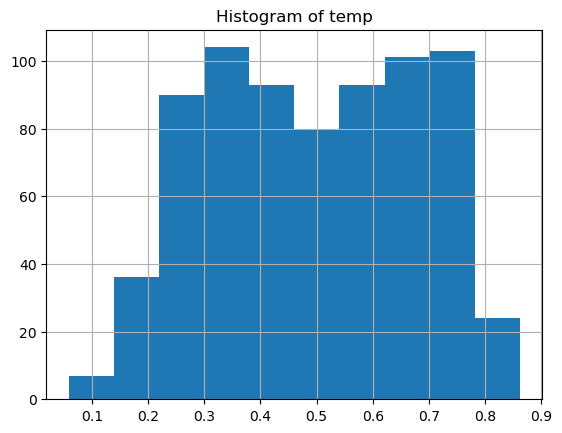

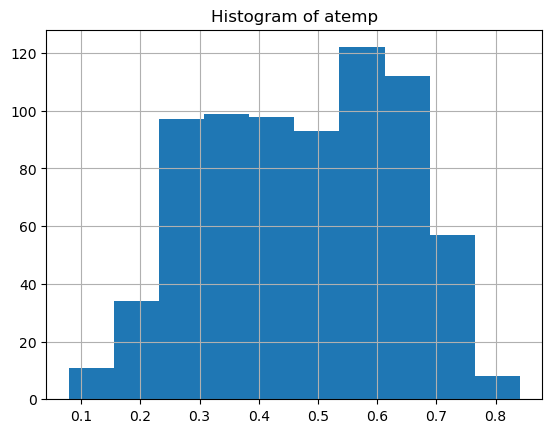

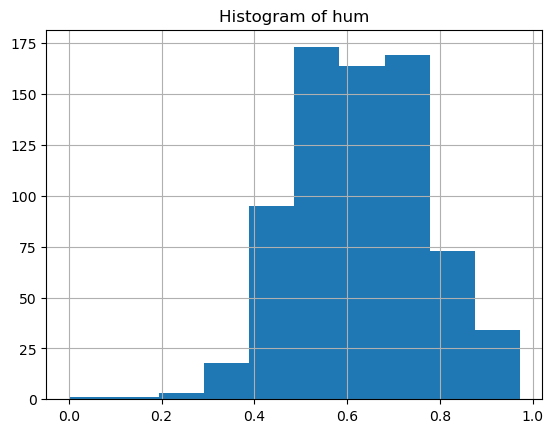

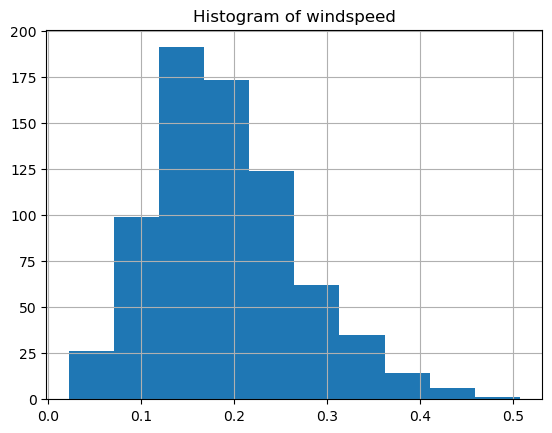

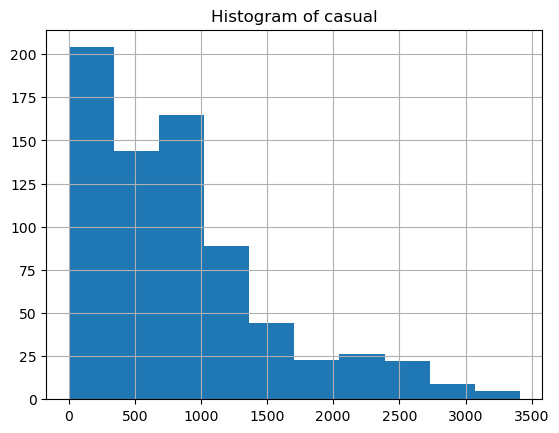

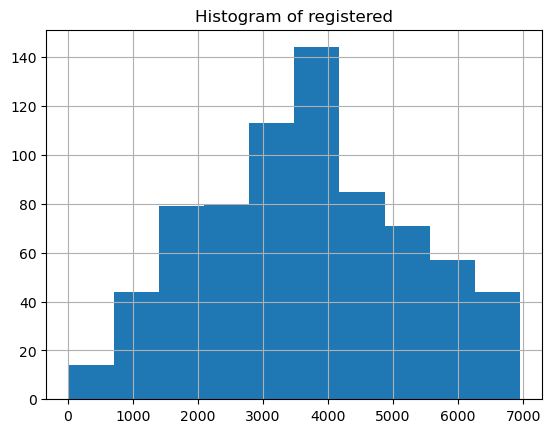

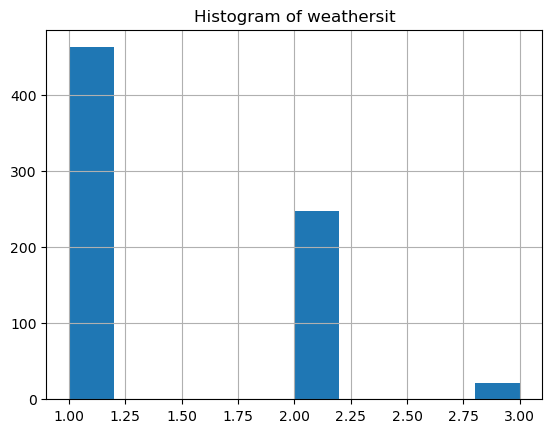

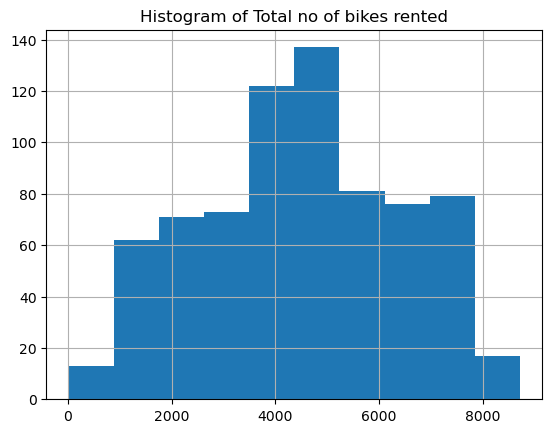

In [22]:
for col in num_columns:
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.show()


In [23]:
#feature engineering
df['dteday'] = pd.to_datetime(df['dteday'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant                   731 non-null    int64         
 1   dteday                    731 non-null    datetime64[ns]
 2   season                    731 non-null    int64         
 3   yr                        731 non-null    int64         
 4   mnth                      731 non-null    int64         
 5   holiday                   731 non-null    int64         
 6   weekday                   731 non-null    int64         
 7   workingday                731 non-null    int64         
 8   weathersit                731 non-null    int64         
 9   temp                      731 non-null    float64       
 10  atemp                     731 non-null    float64       
 11  hum                       731 non-null    float64       
 12  windspeed             

In [25]:
df['day'] = df['dteday'].dt.day
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Total no of bikes rented,day
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,31


In [26]:
df.drop('dteday', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   731 non-null    int64  
 1   season                    731 non-null    int64  
 2   yr                        731 non-null    int64  
 3   mnth                      731 non-null    int64  
 4   holiday                   731 non-null    int64  
 5   weekday                   731 non-null    int64  
 6   workingday                731 non-null    int64  
 7   weathersit                731 non-null    int64  
 8   temp                      731 non-null    float64
 9   atemp                     731 non-null    float64
 10  hum                       731 non-null    float64
 11  windspeed                 731 non-null    float64
 12  casual                    731 non-null    int64  
 13  registered                731 non-null    int64  
 14  Total no o

<Axes: >

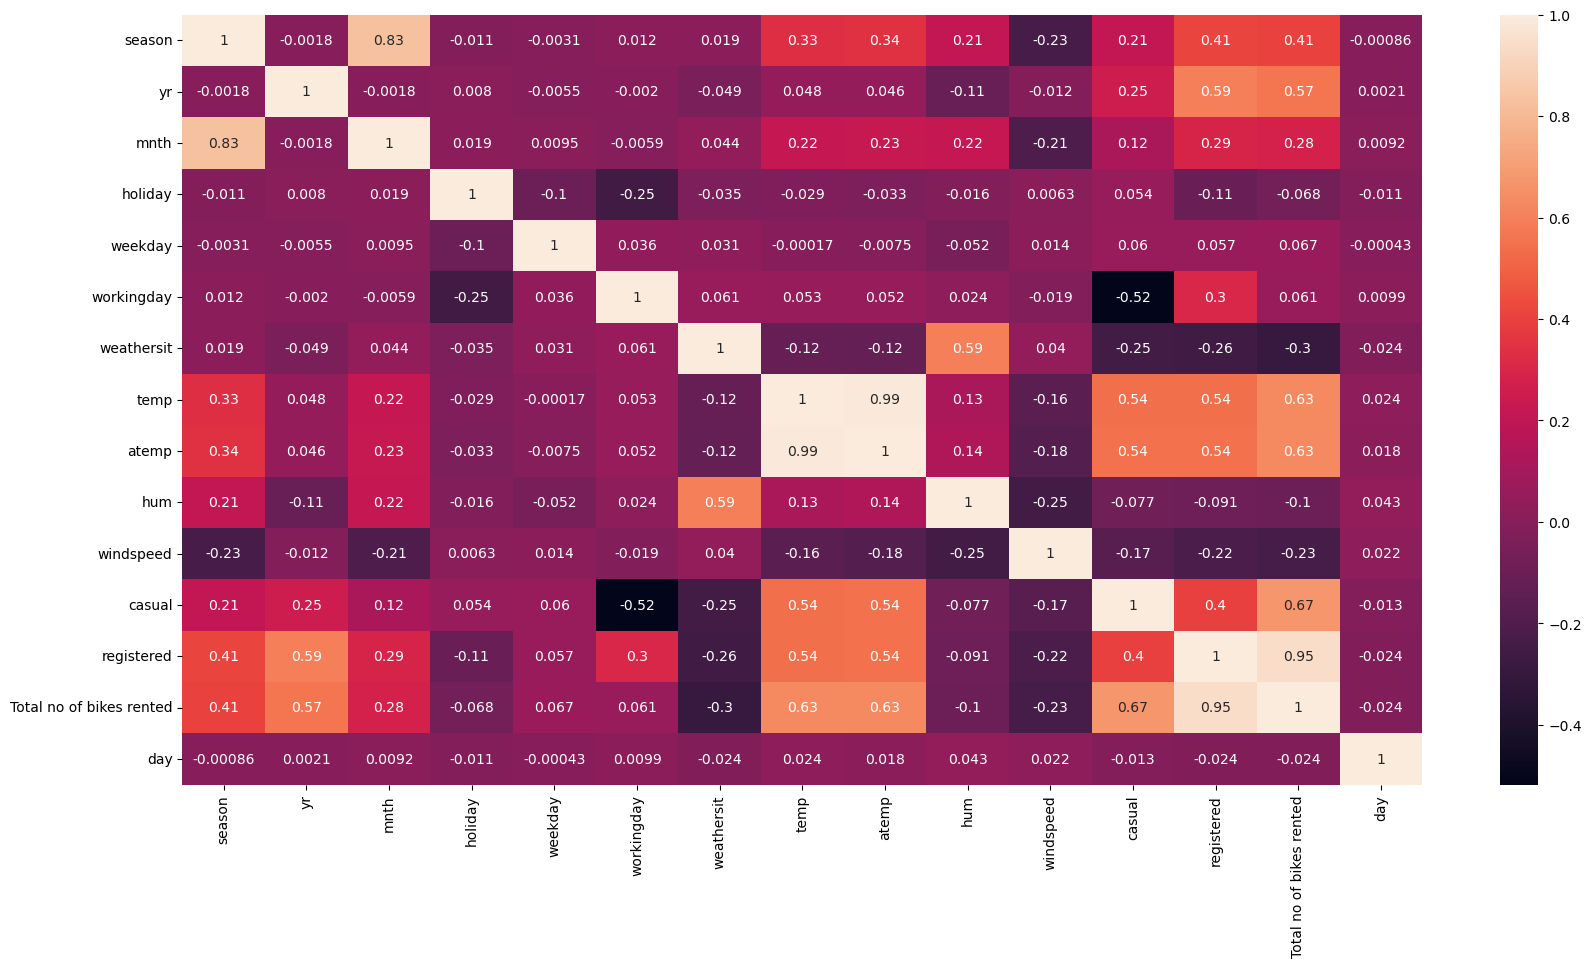

In [27]:
df.drop('instant', axis=1,inplace=True)
# do the features correlate with each other
# do the feature correlate with the label
plt.figure(figsize=(20,10))
sb.heatmap(data=df.corr(), annot=True)

Correlation ranges from -1 to 1

Close to -1 : High negative correlation 0 : No correlation Close to + 1 : High positive correlation

The numerical columns that correlate with the label : registered, casual, temp, ate

# Model Building

In [30]:
X = df.drop('Total no of bikes rented', axis = 1)

In [31]:
y = df['Total no of bikes rented']

In [32]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,5


In [33]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: Total no of bikes rented, Length: 731, dtype: int64

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  day         731 non-null    int32  
dtypes: float64(4), int32(1), int64(9)
memory usage: 77.2 KB


In [35]:
# Algorithms 

# Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Training and testing

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [37]:
X_train.shape

(584, 14)

In [38]:
X_test.shape

(147, 14)

In [39]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
97,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,8
503,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,18
642,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,4
498,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,13
303,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,31


In [40]:
model = LinearRegression().fit(X_train, y_train)


In [41]:
print(model)

LinearRegression()


In [42]:
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
196,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,16
187,3,0,7,0,4,1,1,0.750000,0.686871,0.651250,0.159200,754,3838,7
14,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,15
31,1,0,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213,47,1313,1
390,1,1,1,0,4,1,2,0.341667,0.356050,0.769583,0.073396,244,3831,26


In [43]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: Total no of bikes rented, Length: 147, dtype: int64

In [44]:
model.intercept_

0.0

In [45]:
model.coef_

array([-7.12695624e-14, -3.81749679e-14,  1.06398788e-13, -1.60187357e-13,
        2.61955150e-14,  1.89208818e-14,  3.36738636e-14,  1.89366638e-12,
        8.58590096e-13, -1.93517746e-13, -4.75758988e-13,  1.00000000e+00,
        1.00000000e+00,  2.12653874e-19])

In [46]:
##### Model Evaluation
predictions = model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

r2 = r2_score(y_test, predictions)
print(r2)

MSE 5.7642390475102565e-25
1.0


In [48]:
RMSE = np.sqrt(mse)
print('RMSE', RMSE) 

RMSE 7.592258588529672e-13


In [49]:
predictions_train = model.predict(X_train)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_train, predictions_train)
print("MSE", mse)

r2 = r2_score(y_train, predictions_train)
print(r2)

MSE 4.252732282196993e-25
1.0


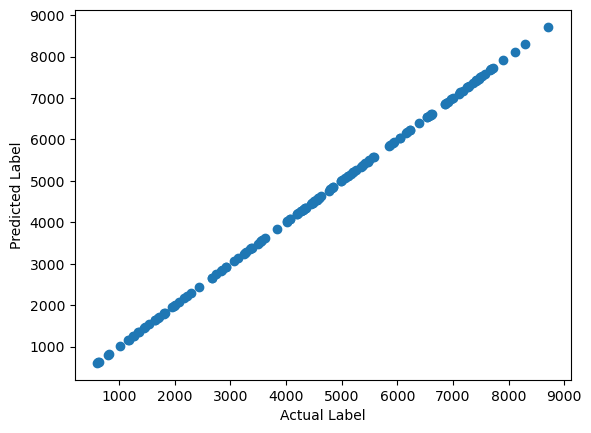

In [51]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

# Tree Based Algorithms

In [53]:
# Decision Tree 

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

r2 = r2_score(y_test, predictions)
print(r2)

MSE 48545.44217687075
0.9885859835486587


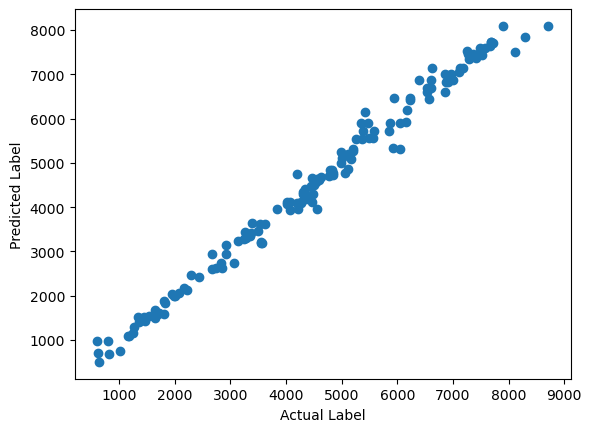

In [55]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [56]:
# lasso regression

from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train, y_train)

Lasso()

In [57]:
predictions = model_lasso.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

r2 = r2_score(y_test, predictions)
print(r2)

MSE 1.9024215524212327e-06
0.9999999999995527


In [58]:
model_lasso.coef_

array([-0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  1.0000018 ,  0.99999926,  0.        ])

In [59]:
# Model with scaled features

X_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2.510274,0.496575,6.544521,0.027397,3.001712,0.691781,1.386986,0.491457,0.470773,0.623689,0.189493,840.277397,3655.010274,15.515411
std,1.109709,0.500417,3.460843,0.163378,1.989250,0.462153,0.537673,0.184297,0.164127,0.140206,0.076474,675.854693,1535.021817,8.680716
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.042304,2.000000,20.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.332083,0.331115,0.514896,0.133543,309.750000,2506.750000,8.000000
50%,2.500000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.485417,0.474744,0.621042,0.179723,717.000000,3667.000000,15.000000
75%,3.250000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655208,0.608289,0.723959,0.233481,1077.000000,4725.500000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.826371,0.972500,0.422275,3283.000000,6946.000000,31.000000


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
X_train_scaled[0]

array([-0.46022082, -0.99317398, -0.73586181, -0.16783627,  1.00540443,
        0.66749124,  1.14109998, -0.84514833, -0.89210862,  1.51736496,
        0.49077526, -0.98963623, -1.53615406, -0.86650157])

In [62]:
model_linear_scaled = LinearRegression()

model_linear_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
predictions = model_linear_scaled.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

r2 = r2_score(y_test, predictions)
print(r2)

MSE 24951.815724743654
0.9941333228743614


In [64]:
RMSE = np.sqrt(mse)
print('RMSE', RMSE) 

RMSE 157.96143746099443


# Model Persistence

In [66]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

# Make predictions on new data

In [68]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
97,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,8
503,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,18
642,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,4
498,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,13
303,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,4429,8
192,3,0,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254,662,3596,12
629,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917,21
559,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,13


In [69]:
new_info = np.array([X_train.loc[97]])
new_info

array([[2.00000e+00, 0.00000e+00, 4.00000e+00, 0.00000e+00, 5.00000e+00,
        1.00000e+00, 2.00000e+00, 3.35833e-01, 3.24479e-01, 8.36250e-01,
        2.26992e-01, 1.72000e+02, 1.29900e+03, 8.00000e+00]])

In [70]:
loaded_model = joblib.load('model.pkl')

In [71]:
predicted_bikes = loaded_model.predict(new_info)

In [72]:
predicted_bikes

array([1471.])